In this notebook we will estimate phylogenies via maximum likelihood and them employ [Tempest](http://tree.bio.ed.ac.uk/software/tempest/) to look at root-to-tip divergences (RDV). Visualisation via **ggplot2**.
First, we'll run [this](https://github.com/ebov/space-time/blob/master/Scripts/run_ml_v2.sh) script to get the ML phylogenies. I've used [this](https://raw.githubusercontent.com/npchar/Phylogenomic/master/fasta2relaxedPhylip.pl) cool PERL script to convert `.fasta` to relaxed PHYLIP.
The relevant files are [serotype_A_VP1.ml.tree](https://github.com/maxbiostat/FMDV_AMERICA/tree/master/DATA/TREES/serotype_A_VP1.ml.tree) and [serotype_O_VP1.ml.tree](https://github.com/maxbiostat/FMDV_AMERICA/tree/master/DATA/TREES/serotype_O_VP1.ml.tree).

In [3]:
library(ggplot2)

In [5]:
rdv.A <- read.table("../../DATA/TREES/serotype_A_rdv.txt", header = TRUE)
rdv.A$serotype <- "A"
rdv.O <- read.table("../../DATA/TREES/serotype_O_rdv.txt", header = TRUE)
rdv.O$serotype <- "O"

A.lm <- lm(distance ~ date, data = rdv.A)
O.lm <- lm(distance ~ date, data = rdv.O)

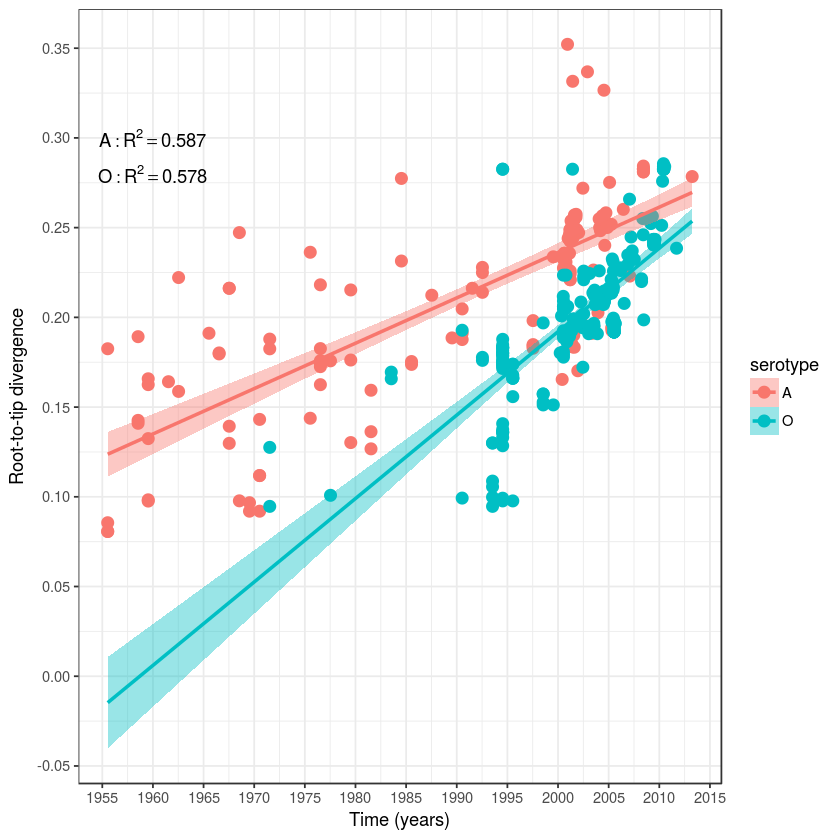

In [7]:
forplot <- rbind(rdv.A, rdv.O)
number_ticks <- function(n) {function(limits) pretty(limits, n)}

p <- qplot(date, distance, data = forplot, colour = serotype, fill = serotype) 
q <- p +
  geom_point(size = 3)+
  stat_smooth(method = "lm", se = TRUE, fullrange = TRUE) +
  scale_x_continuous("Time (years)", breaks = number_ticks(10)) + 
  scale_y_continuous("Root-to-tip divergence", breaks = number_ticks(10)) +
  theme_bw() +
  annotate("text", x = 1960, y = .3,
           label = paste("A: R^2  == ", round(summary(A.lm)$r.squared, 3)), parse = TRUE) +
  annotate("text", x = 1960, y = .28,
           label = paste("O:R^2 == ", round(summary(O.lm)$r.squared, 3)), parse = TRUE)
q

In [8]:
pdf("../../FIGURES/PLOTS/rdvs.pdf")
q
dev.off()

png 
  2